# Introduction to Process Mining

In [1]:
!pip install -U pm4py
!pip install visualization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26099 sha256=c1d152f256e61dd143733fa30eb59d2d208fcd06334223f1a77a0c9cc9f1e78e
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
  Created wheel for stringdist: filename=StringDist-1.0.9-cp310-cp310-linux_x86_64.whl size=24955 sha256=674007d13c11d619113348d2e12686260c79b88d61e9dc187b7f91e0bd6b4773
  Stored in directory: /root/.cache/pip/wheels/79/25/0a/4a0c2c7af31a8b473f6e10e30312396f31ae899722600d7b99
Successfully built intervaltree stringdist
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.

## Setup

In [ ]:
!pip install -U pm4py
!pip install visualization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26114 sha256=afaf0ced199298aca6ed7c4c03fdeb7532e81800d3e3a31de709c3a30cea17e7
  Stored in directory: /root/.cache/pip/wheels/ab/fa/1b/75d9a713279796785711bd0bad8334aaace560c0bd28830c8c
  Created wheel for stringdist: filename=StringDist-1.0.9-cp39-cp39-linux_x86_64.whl size=24705 sha256=0221e7123a1a1882a2f23b1e6a768248e478cddfee002db49d9cd97ca65a3911
  Stored in directory: /root/.cache/pip/wheels/77/24/44/b12b9612fd07e141e6b4f1bb2001c621515bd0cac1014a783a
Successfully built intervaltree stringdist
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.8/

In [ ]:
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.util import dataframe_utils

# process mining 
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization

#sklearn
from sklearn.metrics import pairwise_distances_argmin


# viz

from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.petri_net.util import performance_map 
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer


# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter

from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

## Loading the data

### XES

In [ ]:
log = xes_importer.apply('running-example.xes')

/usr/local/lib/python3.9/dist-packages/pm4py/util/dt_parsing/parser.py:76: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

### CSV

In [ ]:
df = pd.read_csv('running-example.csv')
df = dataframe_utils.convert_timestamp_columns_in_df(df)
df = df.sort_values('time:timestamp')

log = log_converter.apply(df)

In [ ]:
df.sort_values(['case:concept:name', 'time:timestamp']).reset_index(drop=True)

,Activity,Costs,Resource,case:concept:name,case:creator,concept:name,org:resource,time:timestamp
0,register request,50,Pete,1,Fluxicon Nitro,register request,Pete,2010-12-30 10:02:00+00:00
1,examine thoroughly,400,Sue,1,Fluxicon Nitro,examine thoroughly,Sue,2010-12-31 09:06:00+00:00
2,check ticket,100,Mike,1,Fluxicon Nitro,check ticket,Mike,2011-01-05 14:12:00+00:00
3,decide,200,Sara,1,Fluxicon Nitro,decide,Sara,2011-01-06 10:18:00+00:00
4,reject request,200,Pete,1,Fluxicon Nitro,reject request,Pete,2011-01-07 13:24:00+00:00
5,register request,50,Mike,2,Fluxicon Nitro,register request,Mike,2010-12-30 10:32:00+00:00
6,check ticket,100,Mike,2,Fluxicon Nitro,check ticket,Mike,2010-12-30 11:12:00+00:00
7,examine casually,400,Sean,2,Fluxicon Nitro,examine casually,Sean,2010-12-30 13:16:00+00:00
8,decide,200,Sara,2,Fluxicon Nitro,decide,Sara,2011-01-05 10:22:00+00:00
9,pay compensation,200,Ellen,2,Fluxicon Nitro,pay compensation,Ellen,2011-01-08 11:05:00+00:00


## Process Mining

### Alpha Miner

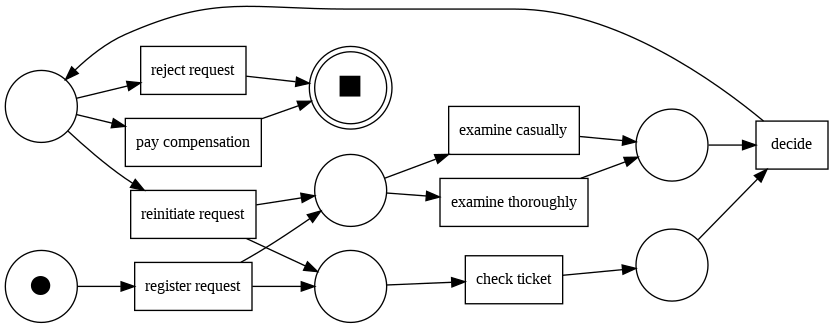

In [ ]:
# alpha miner
net, initial_marking, final_marking = alpha_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

In [ ]:
# add information about frequency to the viz 
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)

# save the Petri net
pn_visualizer.save(gviz, "alpha_miner_petri_net.png")

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

### Directly-Follows Graph

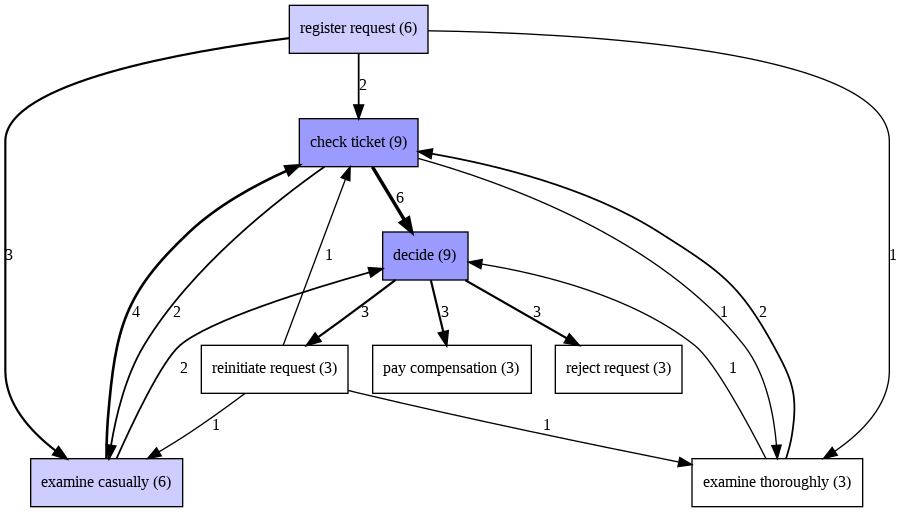

In [ ]:
# creatig the graph from log
dfg = dfg_discovery.apply(log)

# viz
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

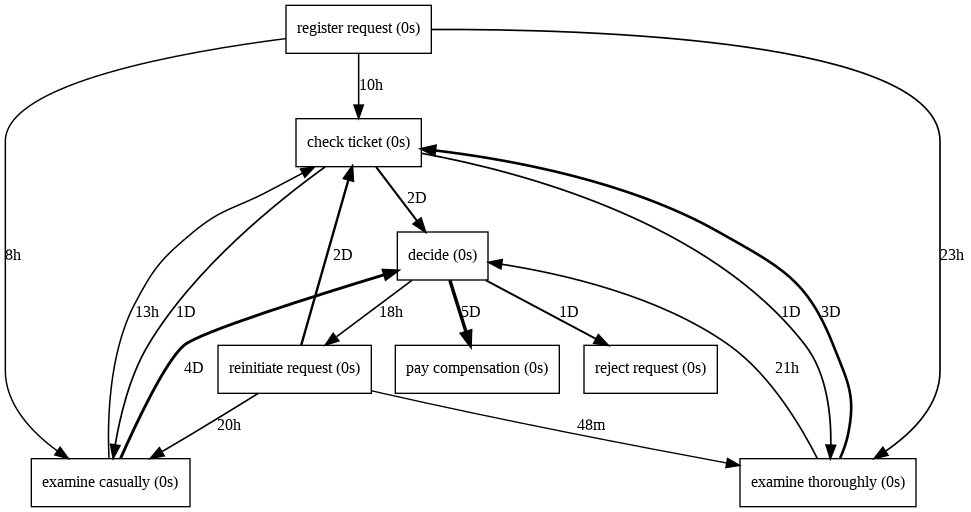

In [ ]:
# creatig the graph from log
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)

# viz
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)

### Heuristic Miner

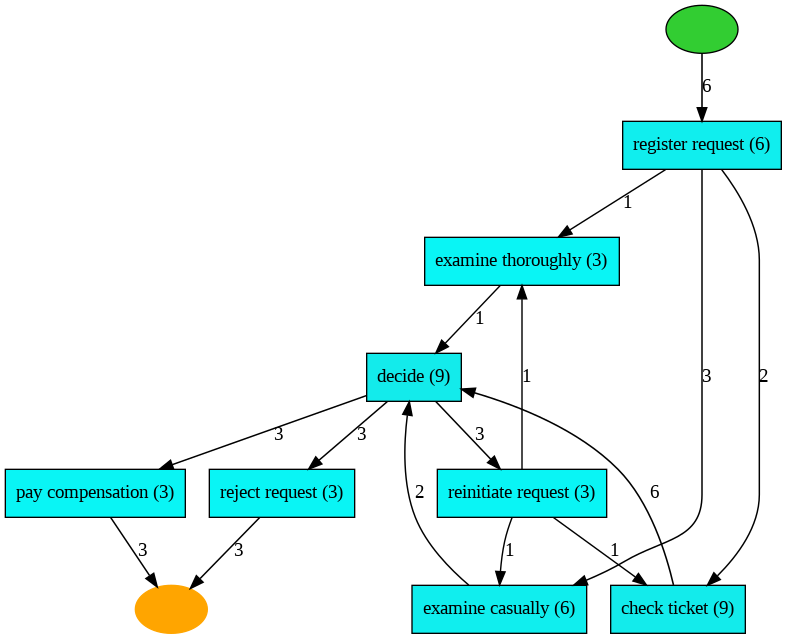

In [ ]:
# heuristics miner
heu_net = heuristics_miner.apply_heu(log)

# viz
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

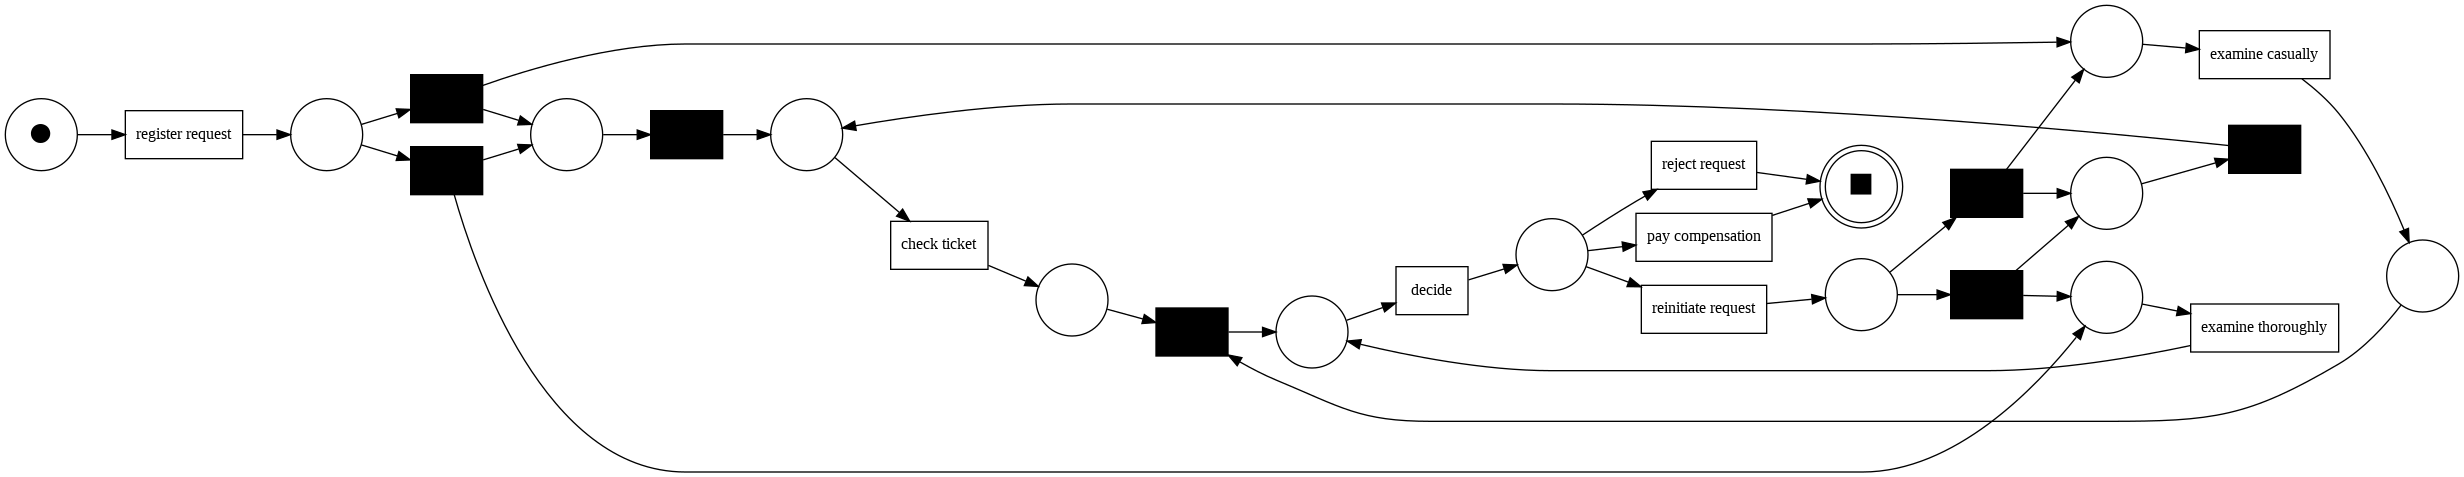

In [ ]:
# heuristics miner
net, im, fm = heuristics_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

### Inductive Miner

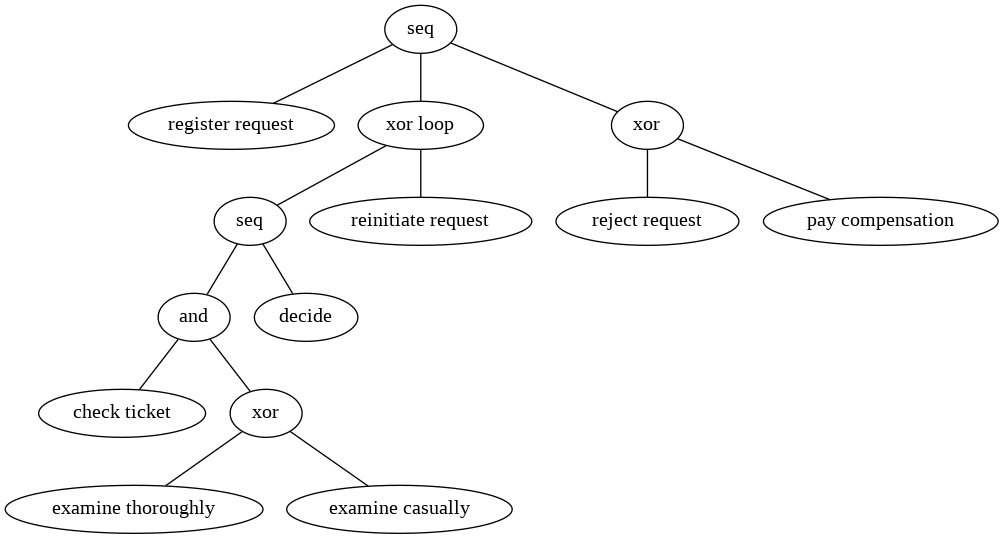

In [ ]:
# create the process tree
tree = inductive_miner.apply(log)

# viz
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

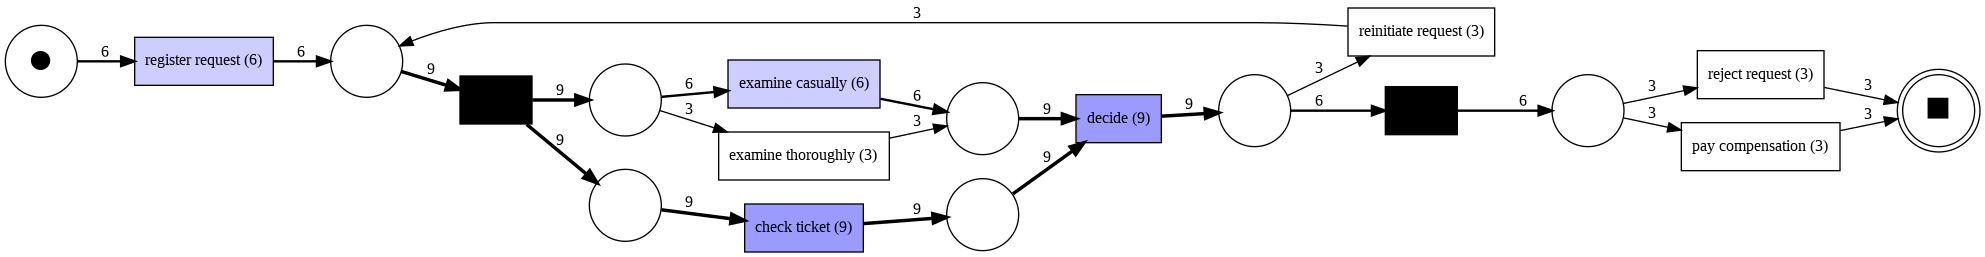

In [ ]:
# convert the process tree to a petri net
net, initial_marking, final_marking = pt_converter.apply(tree)

# alternatively, use the inductive_miner to create a petri net from scratch
# net, initial_marking, final_marking = inductive_miner.apply(log)

# viz
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)
pn_visualizer.view(gviz)